In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os  # To look into the file in server or directory
import cv2  #For image processing

from PIL import Image #Pillow library

from tensorflow import keras  #Building the structure in keras
from tensorflow.keras import layers as k

from tqdm.notebook import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator

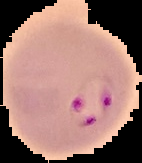

In [79]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
load_img(r"C:\Users\Admin\Desktop\J_notebook\CNN\Malarial Cell Image Data\cell_images\Parasitized\C33P1thinF_IMG_20150619_114756a_cell_179.png")

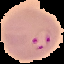

In [55]:
#Parasite
load_img(r"C:\Users\Admin\Desktop\J_notebook\CNN\Malarial Cell Image Data\cell_images\Parasitized\C33P1thinF_IMG_20150619_114756a_cell_179.png", target_size=(64,64))

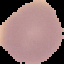

In [57]:
#uninfected
load_img(r"C:\Users\Admin\Desktop\J_notebook\CNN\Malarial Cell Image Data\cell_images\Uninfected\C1_thinF_IMG_20150604_104722_cell_9.png", target_size=(64,64))

In [1]:
# we are using tenserflow as backend in keras. Another option is keras
# seed makes sure that the results are reproducable(we can get exact same result again and again)

In [81]:
os.environ['KERAS_BACKEND'] = 'tensorflow'
np.random.seed(312)

In [83]:
image_dir = (r"C:\Users\Admin\Desktop\J_notebook\CNN\Malarial Cell Image Data\cell_images/")
size = 64
dataset = []    #input
label = []     #output

# PARASITIZED IMAGE

In [85]:
# ENUMERATE adds a counter with the list element
#Preparing the data

parasitized_img = os.listdir(image_dir + "Parasitized/")
parasitized_img = parasitized_img[:1000]

for i, img_name in enumerate (parasitized_img):
    if (img_name.split('.')[1] == "png"):   #spliting the image name by '.' and then getting the word at index 1, i.e-png
        image = cv2.imread(image_dir +"Parasitized/" + img_name)

        if image is not None:  
             image = Image.fromarray(image, 'RGB')
             image = image.resize((size, size))  # Resize the image to 64x64
        
             dataset.append(np.array(image))
             label.append(0)
       
    

# UNINFECTED IMAGE

In [87]:
Uninfected_img = os.listdir(image_dir + "Uninfected/")
Uninfected_img = Uninfected_img[:1000]

for i, img_name in enumerate (Uninfected_img):
    if (img_name.split('.')[1] == "png"):   #spliting the image name by '.' and then getting the word at index 1, i.e-png
        image = cv2.imread(image_dir +"Uninfected/" + img_name)

        image = Image.fromarray(image, 'RGB')
        image = image.resize((size, size))  # Resize the image to 64x64
        
        dataset.append(np.array(image))
        label.append(0)

In [89]:
len(Uninfected_img)

1000

# CREATING TRAIN & TEST DATA

In [91]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical   #for converting the append numerical values 0 & 1 into categorical values

xtrain,xtest,ytrain,ytest = train_test_split(dataset, to_categorical(np.array(label)), test_size=0.2, random_state=0)

CNN MODEL ARCHITECTURE

In [93]:
INPUT_SHAPE = (size,size,3) # 3 is for RGB

inp = k.Input(shape = INPUT_SHAPE)  #Input Layer
conv1 = k.Conv2D(32, kernel_size = (3,3), activation = "relu", padding = "same")(inp)  # kernel size is the filter size (convolutional layer-1)
pool1 = k.MaxPool2D(pool_size = (2,2))(conv1)  #Pooling
norm1 = k.BatchNormalization(axis=-1)(pool1)  #Normalizing the data for uniformity along y-axis
drop1 = k.Dropout(rate = 0.2)(norm1)

conv2 = k.Conv2D(32, kernel_size = (3,3), activation = "relu", padding = "same")(drop1)  # kernel size is the filter size (convolutional layer-2)
pool2 = k.MaxPool2D(pool_size = (2,2))(conv2)  #Pooling
norm2 = k.BatchNormalization(axis=-1)(pool2)  #Normalizing the data for uniformity along y-axis
drop2 = k.Dropout(rate = 0.2)(norm2)

# covolution with fully connected layer

flat = k.Flatten()(drop2)

hidden1 = k.Dense(512, activation = "relu")(flat)  #no.of feature=512
norm3 = k.BatchNormalization(axis=-1)(hidden1)  
drop3 = k.Dropout(rate = 0.2)(norm3)

hidden2 = k.Dense(256, activation = "relu")(drop3)  
norm4 = k.BatchNormalization(axis=-1)(hidden2)  
drop4 = k.Dropout(rate = 0.2)(norm4)

out = k.Dense(2, activation = "sigmoid")(drop4)  # 2 neurons are taken here, 1 for Parasitized and 1 for Uninfected



In [67]:
# Putting all the layers in a model

model = keras.Model(inputs = inp, outputs = out)
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])  # adam optimizer is 2nd order gradient descent

print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,340,130 (16.56 MB)

 Trainable params: 4,338,466 (16.55 MB)

 Non-trainable params: 1,664 (6.50 KB)

None


In [ ]:
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)

In [1]:
xtrain.shape

NameError: name 'xtrain' is not defined

In [75]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(test_generator))

SyntaxError: incomplete input (603875104.py, line 1)

In [55]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


NameError: name 'history' is not defined

<Figure size 1000x600 with 0 Axes>